In [ ]:
! git clone https://github.com/dheeralbhole/FuelSense.git

Cloning into 'FuelSense'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 50 (delta 11), reused 25 (delta 4), pack-reused 0
Unpacking objects: 100% (50/50), done.


In [ ]:
#Loading The DataSet
import pandas as pd

data = pd.read_csv("/content/measurements.csv")
noofpatients = data.shape

data.columns = ['date','distance','consume','speed','temp_inside','temp_outside','specials','gas_type','AC','rain','sun','refill liters','refill gas']




In [ ]:
data.describe()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,refill liters,refill gas
count,388.000000,388.000000,388.000000,376.000000,388.000000,388.000000,388.000000,388.000000,388.000000,13.000000,388.000000
mean,19.652835,4.912371,41.927835,21.929521,11.358247,0.412371,0.077320,0.123711,0.082474,37.115385,0.033505
std,22.667837,1.033172,13.598524,1.010455,6.991542,0.492897,0.267443,0.329677,0.275441,8.587282,0.180184
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000,0.000000,37.600000,0.000000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000,0.000000,38.000000,0.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,1.000000,0.000000,0.000000,0.000000,39.000000,0.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,1.000000,45.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    int64  
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     float64
 11  refill gas     388 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 36.5+ KB


In [ ]:
data.astype({'AC':'bool'}).dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type           int64
AC                  bool
rain               int64
sun                int64
refill liters    float64
refill gas         int64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           388 non-null    object 
 1   distance       388 non-null    float64
 2   consume        388 non-null    float64
 3   speed          388 non-null    int64  
 4   temp_inside    376 non-null    float64
 5   temp_outside   388 non-null    int64  
 6   specials       93 non-null     object 
 7   gas_type       388 non-null    int64  
 8   AC             388 non-null    int64  
 9   rain           388 non-null    int64  
 10  sun            388 non-null    int64  
 11  refill liters  14 non-null     float64
 12  refill gas     388 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 39.5+ KB


# New Section

In [ ]:
print(data.isnull().sum(axis=0))

date               0
distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    374
refill gas         0
dtype: int64


In [85]:
! ls
! 

Corr3.png  data.txt  FuelSense	measurements.csv  sample_data


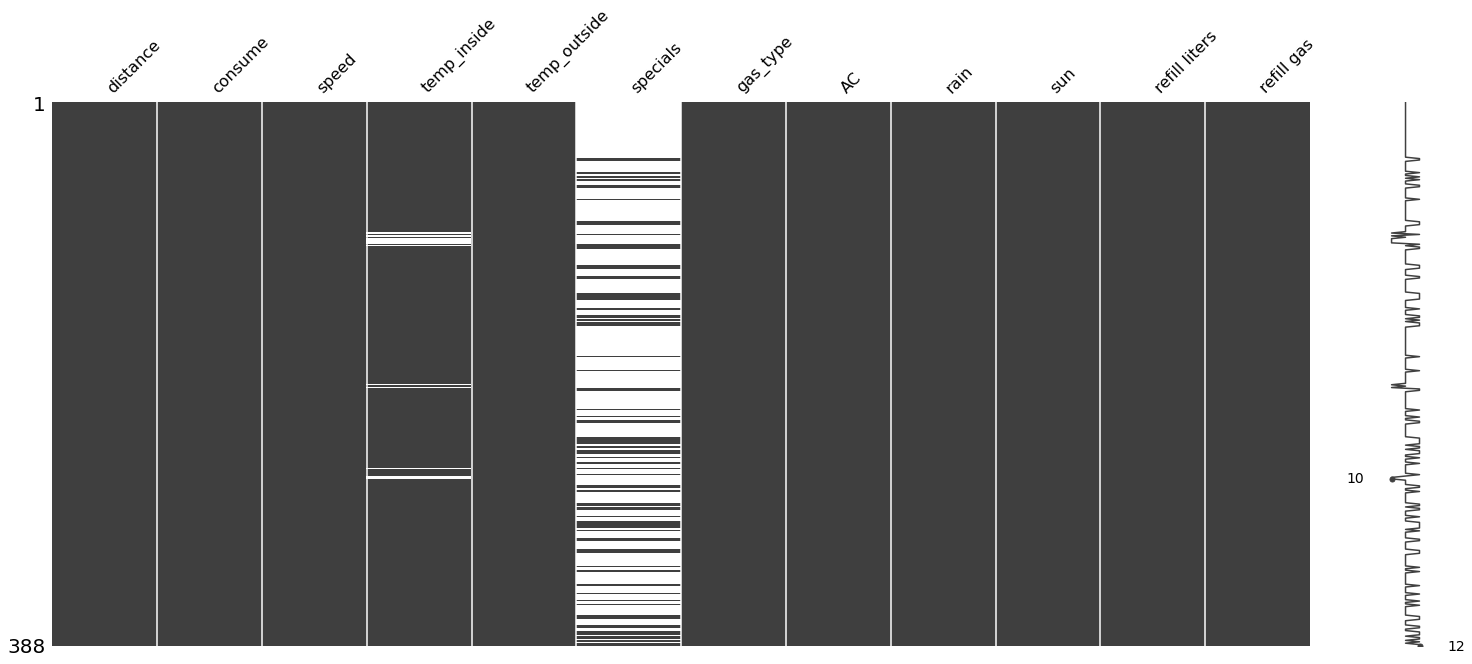

In [ ]:
import missingno as msno
data['refill liters'] = data['refill liters'].fillna(0)
msno.matrix(data)

In [ ]:
print(.shape)

(388,)


     distance  consume  speed  ...  refill liters  refill gas       date
387      14.7      5.0   25.0  ...      34.355556         0.0  1/23/2019
386      15.4      4.6   42.0  ...      34.844444         0.0  1/22/2019
385      16.0      3.8   45.0  ...      34.022222         0.0  1/21/2019
384      16.1      4.3   38.0  ...      34.688889         0.0  1/20/2019
383      16.0      3.7   39.0  ...      34.022222         0.0  1/19/2019

[5 rows x 12 columns]


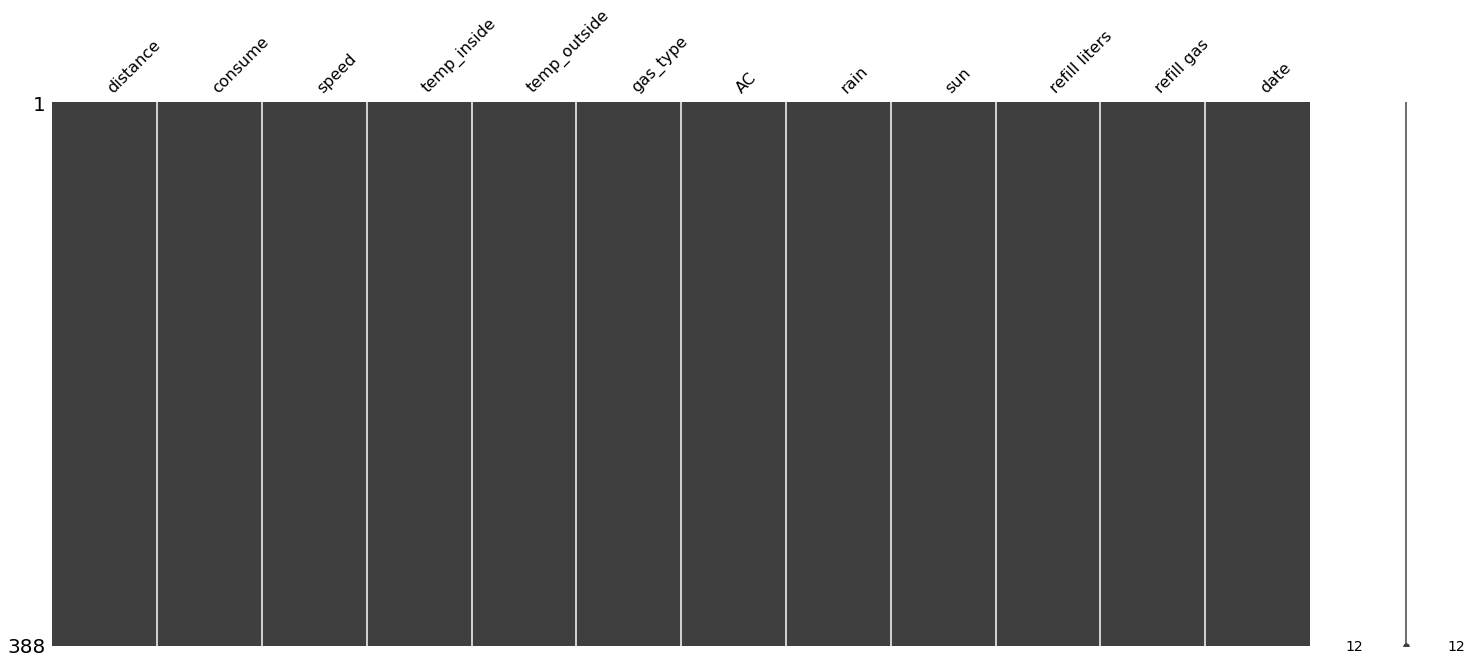

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import json

imputer = KNNImputer(n_neighbors=9)
data1 = data.drop(columns=['date','specials'])

dataimput = imputer.fit_transform(data1)


data2 = pd.DataFrame(dataimput,columns=['distance','consume','speed','temp_inside','temp_outside','gas_type','AC','rain','sun','refill liters','refill gas'])
data2["date"] = data["date"]
data2 = data2.sort_index(axis=0 ,ascending=False)
print(data2.head())
import missingno as msno

msno.matrix(data2)

data3 = data2.to_json(orient='records')

with open('data.txt', 'w') as outfile:
    json.dump(data3, outfile)


In [ ]:
xt_scale = MinMaxScaler().fit_transform(dataimput)
corr = data.corr()
ax = sns.heatmap(corr,
        annot=True,
        vmin=0,
        vmax=1,
        cmap="BuGn")
plt.savefig(fname="Corr3")

In [ ]:
! git add JSON_for_ visualization.ipynb
! git commit -m "KNN Imputer for missing data and generating JSON"
! git status

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
